## Churn prediction using machine learning

##### What is churn prediction?

Churn prediction means when you predict whether the customer is leaving the product/service or not using historical data. 
Churn prediction is a very important business problem because it is costly to bring a new customer as compare to retaining the existing one. 

##### Benefits:
1. Easy way to maintain the customer base for a business.
2. Churn prediction can save millions of dollars for bigger companies. 
3. A way to analys the behavious of your custormes through data.


### Data understanding

The data which we have used for this problem is the data of a telecom company. This data contains three CSV files.
The file with the name 'data_local_billing.csv' contains 16 features and 3333 samples.The file with the name of 
'data_international_billing.csv' 5 columns and 3326 samples. The third file with the name 'data_churn_target' 
contains two columns.
We will combine these three files after loading the data.

Feature information:

data_local_billing.csv file
1. Phone: Phone number of the customer
2. Account Length: accounts time or duration
3. Area code: Customer area code
4. stat: The stat in which customer is living
5. VMail plan: number of voice mails 
6. Vmail Messages: voice mail messages
7. Day Mins: Number of calling minutes during day
8. Day Calls: Number of calls during day.
9. Day Charge: Charges during day
10. Eve Mins: Number of calling minutes during evening
11. Eve Calls: Number of calls during evening.
12. Eve Charge: Charges during evening
13. Night Mins: Number of calling minutes during night
14. Night Calls: Number of calls during night
15. Night Charge : Charges during night
16. CustServ Calls: Customer service calls 

data_international_billing.csv file
1. Phone: Phone number of the customer
2. Intl Plan: Internationla subscription
2. Intl Mins: Number of international calling minutes.
3. Intl Calls : Number of international calls
4. Intl Charge : Charges from international calls


data_churn_target.csv file
1. Phone: Phone number of the customer
2. Churn?: Churned or not


In [20]:
#importing liberies:
#your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


##### Load data 

In [2]:
int_billing = pd.read_csv('directory.../data_international_billing.csv', sep = ',')
local_billing = pd.read_csv('directory.../data_local_billing.csv', sep = ',')
churn_target = pd.read_csv('directory.../data_churn_target.csv', sep = ',')

##### Combining the data into a single dataframe file

In [3]:
# We are combining the files based on the phone number of the  customer 
temp_data = int_billing.merge(local_billing, on = 'Phone', how = 'inner')
churn_data = temp_data.merge(churn_target, on = 'Phone', how = 'inner')
churn_data.head() 

,Phone,Int'l Plan,Intl Mins,Intl Calls,Intl Charge,State,Account Length,Area Code,VMail Plan,VMail Message,...,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,CustServ Calls,Churn?
0,422-9964,no,11.8,3.0,3.19,NJ,72,415,no,0.0,...,103.0,29.84,132.3,120.0,11.25,242.9,96.0,10.93,1,False.
1,422-8344,no,10.9,1.0,2.94,WY,124,415,no,0.0,...,102.0,30.31,235.0,120.0,19.98,239.7,119.0,10.79,3,False.
2,422-8333,no,10.8,4.0,2.92,NE,78,510,yes,32.0,...,116.0,35.75,192.2,83.0,16.34,246.1,92.0,11.07,6,False.
3,422-8268,yes,11.2,7.0,3.02,RI,107,510,no,0.0,...,83.0,33.05,247.8,84.0,21.06,245.4,93.0,11.04,2,False.
4,422-7728,no,9.7,5.0,2.62,NY,64,408,no,0.0,...,126.0,37.33,303.3,100.0,25.78,154.5,65.0,6.95,1,False.


### Exploratory Data Analysis (EDA) 

In [5]:
#length of data
len(churn_data)

3319

In [7]:
#finding missing values
churn_data.isnull().sum()

Phone              0
Int'l Plan         0
Intl Mins          4
Intl Calls         4
Intl Charge        0
State              0
Account Length     0
Area Code          0
VMail Plan         5
VMail Message      6
Day Mins          10
Day Calls          5
Day Charge         0
Eve Mins           0
Eve Calls          1
Eve Charge        12
Night Mins        12
Night Calls        1
Night Charge       5
CustServ Calls     0
Churn?             0
dtype: int64

In [8]:
#data types of each column
churn_data.dtypes

Phone              object
Int'l Plan         object
Intl Mins         float64
Intl Calls        float64
Intl Charge       float64
State              object
Account Length      int64
Area Code           int64
VMail Plan         object
VMail Message     float64
Day Mins          float64
Day Calls         float64
Day Charge        float64
Eve Mins          float64
Eve Calls         float64
Eve Charge        float64
Night Mins        float64
Night Calls       float64
Night Charge      float64
CustServ Calls      int64
Churn?             object
dtype: object

In [9]:
#Data statistics
churn_data.describe()

,Intl Mins,Intl Calls,Intl Charge,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,CustServ Calls
count,3315.000000,3315.000000,3319.000000,3319.000000,3319.000000,3313.000000,3309.000000,3314.000000,3319.000000,3319.000000,3318.000000,3307.000000,3307.000000,3318.000000,3314.000000,3319.000000
mean,10.231825,4.483258,2.762760,101.088882,437.167822,8.091156,179.868480,100.435124,30.570931,200.900813,100.135322,17.074103,200.996311,100.084690,9.041759,1.563423
std,2.791812,2.462380,0.753577,39.858296,42.363910,13.681333,54.478986,20.077818,9.262502,50.696076,19.931237,4.309287,50.601556,19.572174,2.276451,1.317156
min,0.000000,0.000000,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000
25%,8.500000,3.000000,2.300000,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.150000,87.000000,7.520000,1.000000
50%,10.300000,4.000000,2.780000,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.200000,100.000000,17.090000,201.400000,100.000000,9.060000,1.000000
75%,12.100000,6.000000,3.270000,127.000000,510.000000,20.000000,216.700000,114.000000,36.820000,235.100000,114.000000,19.980000,235.400000,113.000000,10.590000,2.000000
max,20.000000,20.000000,5.400000,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [10]:
#Count number of phones in each state
churn_data.groupby('State')['Phone'].count() 

State
AK     52
AL     80
AR     55
AZ     63
CA     34
CO     66
CT     74
DC     54
DE     60
FL     62
GA     53
HI     52
IA     44
ID     73
IL     58
IN     71
KS     69
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     61
NE     61
NH     56
NJ     68
NM     62
NV     65
NY     83
OH     78
OK     61
OR     77
PA     45
RI     64
SC     60
SD     60
TN     52
TX     72
UT     72
VA     75
VT     73
WA     66
WI     77
WV    106
WY     77
Name: Phone, dtype: int64

In [11]:
#Finding the average international calling in minutes for each state
churn_data.groupby('State')['Intl Mins'].mean() 

State
AK    10.019231
AL    10.292500
AR    10.372727
AZ    10.666667
CA     9.867647
CO     9.871212
CT    10.050000
DC    10.605556
DE    10.276667
FL    10.027419
GA    10.194340
HI    10.035294
IA     9.672727
ID    10.501370
IL    10.334483
IN     9.997183
KS    10.813043
KY    10.654237
LA     9.331373
MA     9.869231
MD    10.901429
ME     9.993548
MI    10.582192
MN    10.449398
MO    10.111111
MS    10.684615
MT    10.619118
NC     9.958824
ND     9.626230
NE    10.449180
NH    10.121429
NJ    10.808824
NM    10.341935
NV    10.066154
NY     9.985542
OH    10.297436
OK    10.470492
OR    10.279221
PA    10.491111
RI     9.798438
SC     9.913333
SD    10.047458
TN    10.286538
TX    10.558333
UT    10.231944
VA    10.558667
VT    10.152055
WA     9.789394
WI     9.754545
WV    10.074286
WY    10.393506
Name: Intl Mins, dtype: float64

In [12]:
#Finding the average Day calling minutes for each state
churn_data.groupby('State')['Day Mins'].mean()

State
AK    178.384615
AL    186.010000
AR    176.116364
AZ    169.596721
CA    183.564706
CO    178.712121
CT    175.140541
DC    171.379630
DE    175.449153
FL    179.503226
GA    184.798113
HI    175.744231
IA    177.613636
ID    178.619178
IL    173.591379
IN    196.525352
KS    192.659420
KY    173.754237
LA    178.376471
MA    180.103077
MD    197.228571
ME    185.795082
MI    181.297222
MN    183.354762
MO    170.506349
MS    177.929231
MT    175.414706
NC    186.222727
ND    186.777049
NE    177.465574
NH    177.328571
NJ    196.592537
NM    171.363934
NV    174.963077
NY    175.114458
OH    183.274359
OK    179.909836
OR    177.090909
PA    188.375556
RI    167.421875
SC    164.754237
SD    189.690000
TN    175.844231
TX    181.516667
UT    183.569444
VA    178.909333
VT    182.031507
WA    178.742424
WI    179.992208
WV    173.950943
WY    180.170130
Name: Day Mins, dtype: float64

In [13]:
##Finding the average evening calling in minutes for each state
churn_data.groupby('State')['Eve Mins'].mean() 

State
AK    184.282692
AL    195.462500
AR    201.047273
AZ    188.674603
CA    198.970588
CO    206.884848
CT    203.828378
DC    196.272222
DE    207.230000
FL    210.962903
GA    203.098113
HI    190.413462
IA    206.400000
ID    194.610959
IL    196.798276
IN    202.559155
KS    201.642029
KY    196.244068
LA    197.819608
MA    214.664615
MD    196.061429
ME    200.514516
MI    208.172603
MN    199.334524
MO    200.141270
MS    200.009231
MT    201.526471
NC    202.536765
ND    208.606557
NE    203.111475
NH    198.158929
NJ    198.289706
NM    212.193548
NV    202.138462
NY    196.993976
OH    206.441026
OK    193.018033
OR    202.527273
PA    191.653333
RI    210.317187
SC    207.456667
SD    202.723333
TN    209.246154
TX    199.787500
UT    195.343056
VA    203.468000
VT    205.368493
WA    203.810606
WI    197.181818
WV    188.413208
WY    205.828571
Name: Eve Mins, dtype: float64

In [14]:
##Finding the average Night calling in minutes for each state
churn_data.groupby('State')['Night Mins'].mean()

State
AK    192.326923
AL    187.751899
AR    205.454545
AZ    194.434921
CA    198.508824
CO    189.898485
CT    205.997297
DC    206.348148
DE    204.650000
FL    197.495082
GA    194.860377
HI    204.409615
IA    192.276744
ID    202.595890
IL    197.605172
IN    209.987143
KS    203.365217
KY    198.355932
LA    201.396078
MA    204.007692
MD    198.614286
ME    198.833871
MI    192.275000
MN    209.680952
MO    209.146032
MS    200.996923
MT    196.440909
NC    197.144118
ND    198.228333
NE    207.818333
NH    208.614286
NJ    207.311940
NM    200.193548
NV    209.310769
NY    203.268675
OH    204.491026
OK    196.947541
OR    200.174026
PA    195.864444
RI    205.809375
SC    195.136667
SD    201.310000
TN    211.686275
TX    195.288889
UT    190.519444
VA    212.836000
VT    206.989041
WA    200.045455
WI    198.697403
WV    201.055660
WY    199.214474
Name: Night Mins, dtype: float64

In [15]:
#Counting the number of churned and not churned customers.
churn_data.groupby('Churn?').size()

Churn?
False.    2838
True.      481
dtype: int64

In [ ]:
# Pattern observed 
# The average evening and night calling minute are mostly greater than the day calling minutes in each state.
# You will clearly observe this pattern in the below bar chart

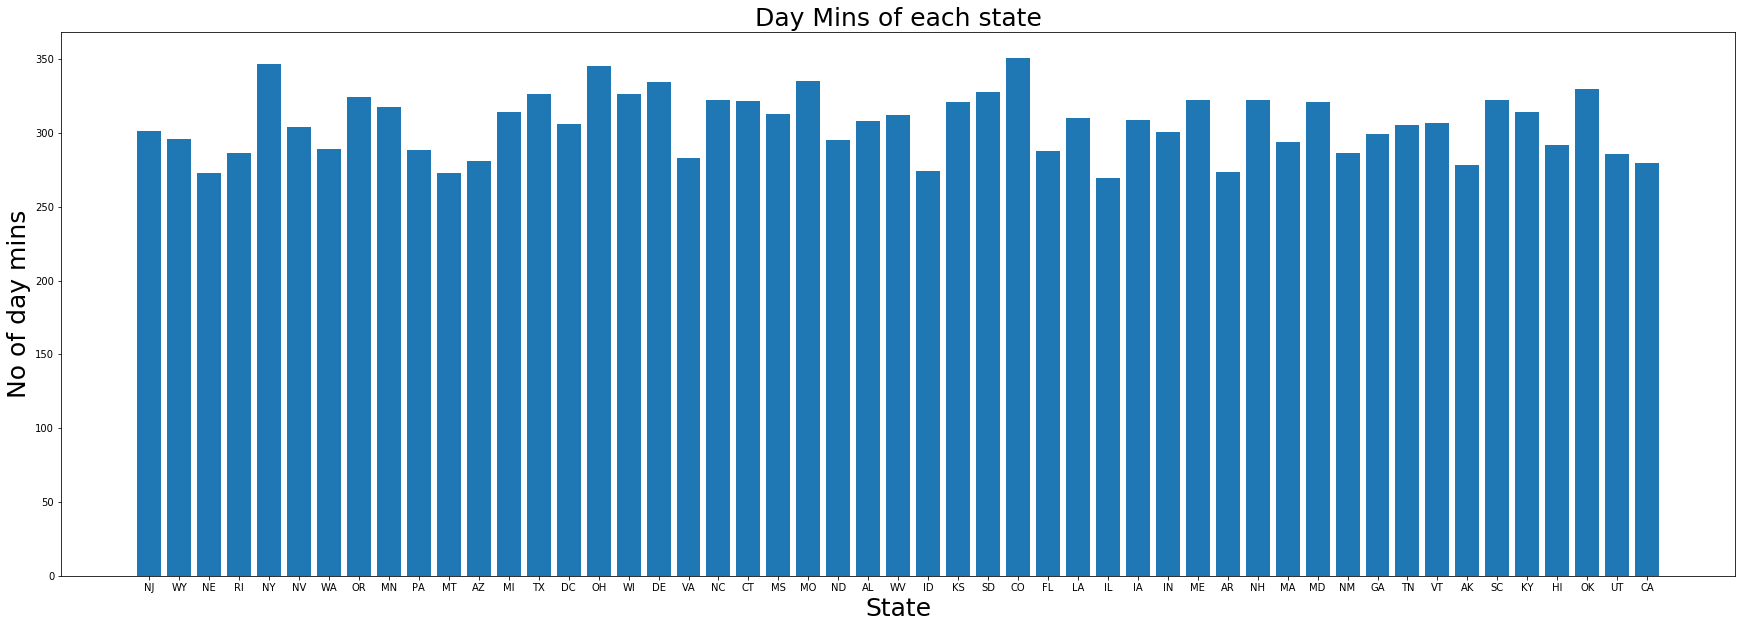

In [16]:
# Bar chart of Day Mins of in each state 
plt.figure(figsize=(30,10))
plt.bar(churn_data['State'], churn_data['Day Mins'])
plt.xlabel('State', fontsize =25)
plt.ylabel('No of day mins', fontsize=25)
#plt.xticks(churn_data['State'], fontsize=15, rotation=30)
plt.title('Day Mins of each state', fontsize = (25))
plt.show()



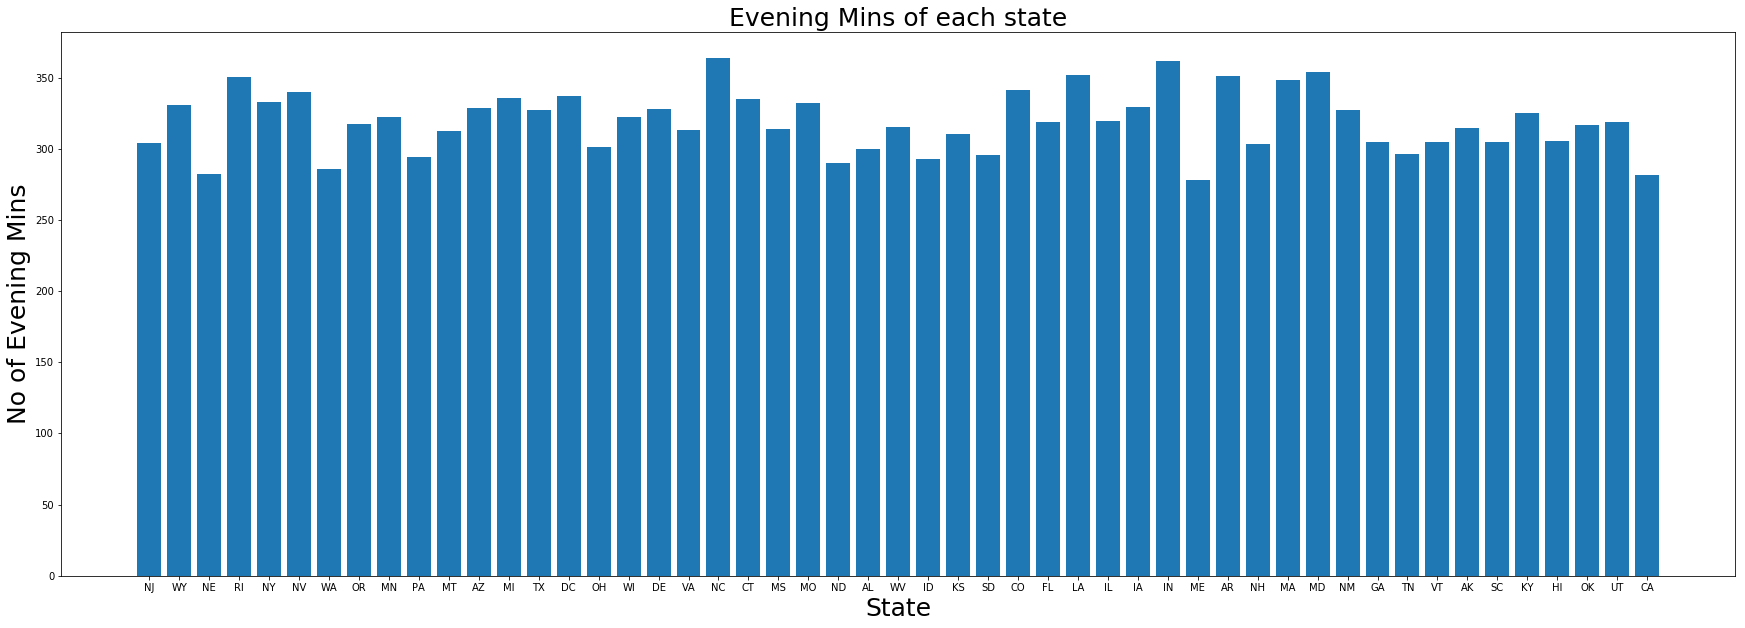

In [22]:
# Bar chart of Evening Mins of in each state 
plt.figure(figsize = (30,10))
plt.bar(churn_data['State'], churn_data['Eve Mins'])
plt.xlabel('State', fontsize = (25))
plt.ylabel('No of Evening Mins', fontsize = (25))
plt.title('Evening Mins of each state', fontsize = (25))
plt.show()

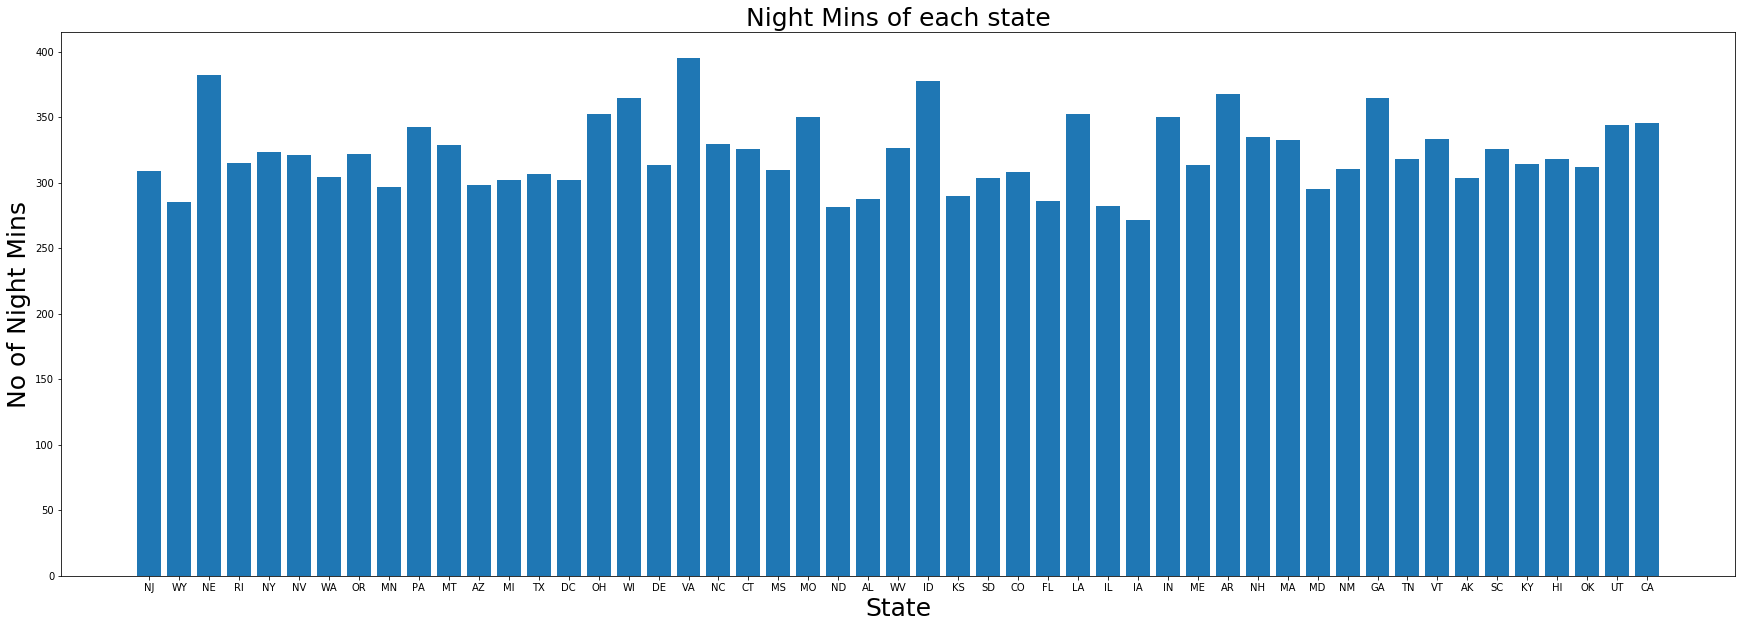

In [23]:
# Bar chart of Night Mins of in each state 
plt.figure(figsize = (30,10))
plt.bar(churn_data['State'], churn_data['Night Mins'])
plt.xlabel('State', fontsize = (25))
plt.ylabel('No of Night Mins', fontsize = (25))
plt.title('Night Mins of each state', fontsize = (25))
plt.show()

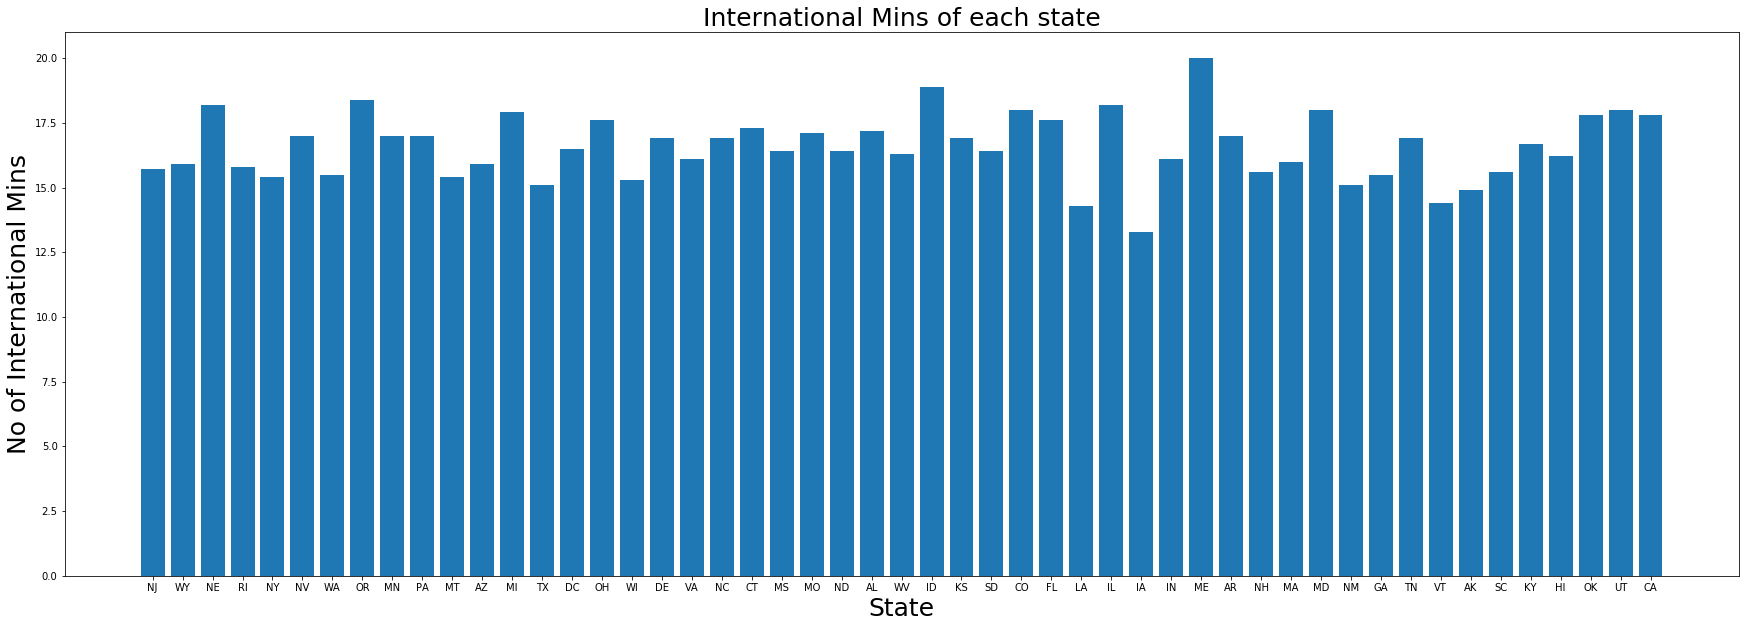

In [24]:
# Bar chart of International Mins of in each state 
plt.figure(figsize = (30,10))
plt.bar(churn_data['State'], churn_data['Intl Mins'])
plt.xlabel('State', fontsize = (25))
plt.ylabel('No of International Mins', fontsize = (25))
plt.title('International Mins of each state', fontsize = (25))
plt.show()

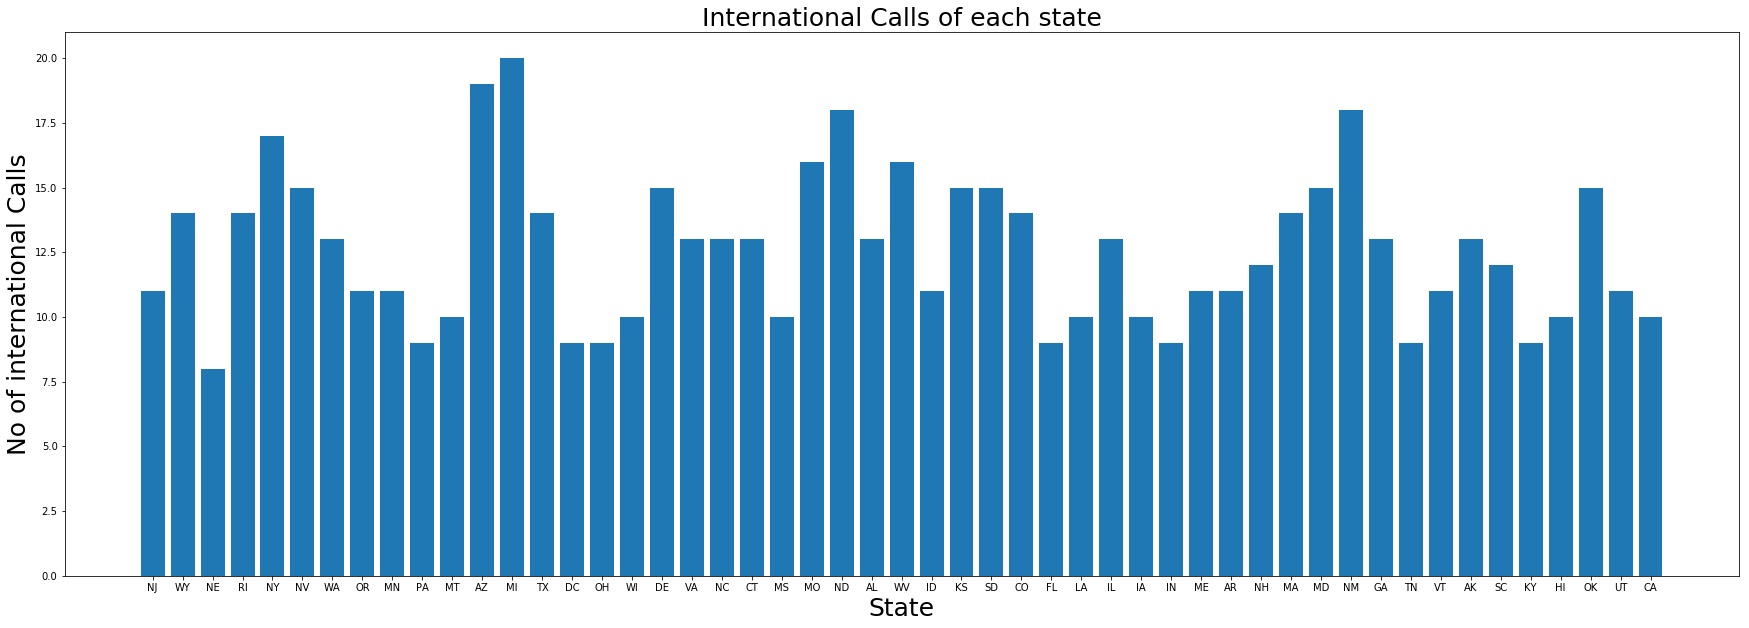

In [25]:
# No of local International calls in each state
plt.figure(figsize = (30,10))
plt.bar(churn_data['State'], churn_data['Intl Calls'])
plt.xlabel('State', fontsize = (25))
plt.ylabel('No of international Calls', fontsize = (25))
plt.title('International Calls of each state', fontsize = (25))
plt.show()

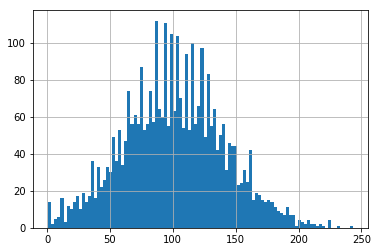

In [26]:
churn_data['Account Length'].hist(bins=100)
plt.show()

In [ ]:
#Converting the data to numerical values 


### Data Pre-processing

In [4]:
#Finding missing values 
churn_data.isnull().sum()

Phone              0
Int'l Plan         0
Intl Mins          4
Intl Calls         4
Intl Charge        0
State              0
Account Length     0
Area Code          0
VMail Plan         5
VMail Message      6
Day Mins          10
Day Calls          5
Day Charge         0
Eve Mins           0
Eve Calls          1
Eve Charge        12
Night Mins        12
Night Calls        1
Night Charge       5
CustServ Calls     0
Churn?             0
dtype: int64

In [5]:
# Replacing null values by zeros
churn_data.fillna(0, inplace = True) 

In [6]:
#Now check data for null values 
churn_data.isnull().sum()

Phone             0
Int'l Plan        0
Intl Mins         0
Intl Calls        0
Intl Charge       0
State             0
Account Length    0
Area Code         0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
CustServ Calls    0
Churn?            0
dtype: int64

##### Converting data to entire numerical values

In [7]:
churn_data["Churn?"].replace(['False.', 'True.'], [0, 1], inplace=True)

In [8]:
churn_data['VMail Plan'].replace(['no', 'yes'], [0, 1], inplace = True)

In [9]:
churn_data["Int'l Plan"].replace(['no', 'yes'], [0, 1], inplace = True)

In [10]:
#Removing the 'Phone' feature
churn_data = churn_data.drop('Phone',1)

In [11]:
churn_data = churn_data.drop('State',1)

In [12]:
churn_data = churn_data.drop('Area Code',1)

In [13]:
churn_data.head()

,Int'l Plan,Intl Mins,Intl Calls,Intl Charge,Account Length,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,CustServ Calls,Churn?
0,0,11.8,3.0,3.19,72,0,0.0,175.5,103.0,29.84,132.3,120.0,11.25,242.9,96.0,10.93,1,0
1,0,10.9,1.0,2.94,124,0,0.0,178.3,102.0,30.31,235.0,120.0,19.98,239.7,119.0,10.79,3,0
2,0,10.8,4.0,2.92,78,1,32.0,210.3,116.0,35.75,192.2,83.0,16.34,246.1,92.0,11.07,6,0
3,1,11.2,7.0,3.02,107,0,0.0,194.4,83.0,33.05,247.8,84.0,21.06,245.4,93.0,11.04,2,0
4,0,9.7,5.0,2.62,64,0,0.0,219.6,126.0,37.33,303.3,100.0,25.78,154.5,65.0,6.95,1,0


##### Detecting and remving outliers

In [14]:
#Detecting outliers 
Q1,Q3 = np.percentile(churn_data, [25,75])
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR 

print((churn_data < lower_limit) | (churn_data > upper_limit)) 

      Int'l Plan  Intl Mins  Intl Calls  Intl Charge  Account Length  \
0          False      False       False        False           False   
1          False      False       False        False           False   
2          False      False       False        False           False   
3          False      False       False        False           False   
4          False      False       False        False           False   
5          False      False       False        False           False   
6          False      False       False        False           False   
7          False      False       False        False           False   
8          False      False       False        False           False   
9          False      False       False        False           False   
10         False      False       False        False           False   
11         False      False       False        False           False   
12         False      False       False        False           F

In [15]:
churn_data_new = churn_data[~((churn_data < (Q1 - 1.5 * IQR)) |(churn_data > (Q3 + 1.5 * IQR))).any(axis=1)]
churn_data_new.shape 

(2336, 18)

In [16]:
churn_data_new.shape

(2336, 18)

##### Dividing data into train and test set

In [17]:

X_churn = churn_data_new.iloc[: , 1:17]
Y_churn = churn_data_new['Churn?']

X_train, X_test, Y_train, Y_test = train_test_split(X_churn,Y_churn,test_size = 0.3)
X_churn.head()

,Intl Mins,Intl Calls,Intl Charge,Account Length,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,CustServ Calls
0,11.8,3.0,3.19,72,0,0.0,175.5,103.0,29.84,132.3,120.0,11.25,242.9,96.0,10.93,1
1,10.9,1.0,2.94,124,0,0.0,178.3,102.0,30.31,235.0,120.0,19.98,239.7,119.0,10.79,3
2,10.8,4.0,2.92,78,1,32.0,210.3,116.0,35.75,192.2,83.0,16.34,246.1,92.0,11.07,6
3,11.2,7.0,3.02,107,0,0.0,194.4,83.0,33.05,247.8,84.0,21.06,245.4,93.0,11.04,2
5,10.2,5.0,2.75,113,1,23.0,205.0,101.0,34.85,152.0,60.0,12.92,158.6,59.0,7.14,2


In [18]:
len(X_train)

1635

In [19]:
len(Y_train)

1635

### Model building

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [33]:
#Applying KNN classifier on customer churn data
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train,Y_train)
KNN_predict = KNN.predict(X_test)

In [39]:
#Applying RFC classifier on customer churn data
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)
RFC_predict = RFC.predict(X_test)

In [43]:
#Accuracy of KNN and RFC
KNN_accuracy = accuracy_score(Y_test, KNN_predict)
RFC_accuracy = accuracy_score(Y_test, RFC_predict)
print('KNN_accuracy = ', KNN_accuracy, 'RFC_accuracy = ', RFC_accuracy)

KNN_accuracy =  0.902995720399 RFC_accuracy =  0.93152639087


In [48]:
# KNN Classification report 
print('KNN_clf_report', classification_report(Y_test, KNN_predict))

KNN_clf_report              precision    recall  f1-score   support

          0       0.91      0.99      0.95       637
          1       0.00      0.00      0.00        64

avg / total       0.83      0.90      0.86       701



In [49]:
# RFC Classification report 
print('RFC_clf_report', classification_report(Y_test, RFC_predict))

RFC_clf_report              precision    recall  f1-score   support

          0       0.94      0.98      0.96       637
          1       0.71      0.42      0.53        64

avg / total       0.92      0.93      0.92       701

